# 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x - 2 + np.random.normal(0, 1, 100)

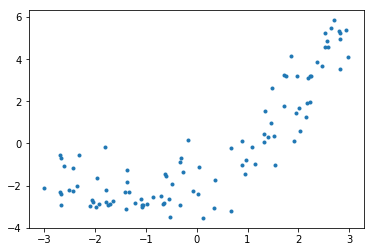

In [3]:
plt.scatter(x, y, marker=".")
plt.show()

#### 学习曲线(一元线性回归)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# 学习曲线 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
train_mse = []
test_mse = []
for k in range(1, X_train.shape[0]+1):
    reg1 = LinearRegression()
    reg1.fit(X_train[:k], y_train[:k])
    y_train_predict = reg1.predict(X_train[:k])
    train_mse.append(mean_squared_error(y_train[:k], y_train_predict))
    y_test_predict = reg1.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_predict))
train_mse = np.array(train_mse)
test_mse = np.array(test_mse)

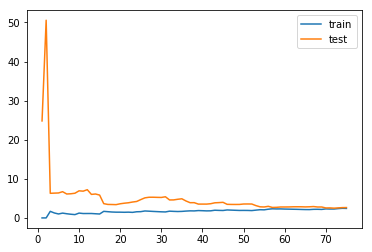

In [7]:
plt.plot(np.arange(1, X_train.shape[0] + 1), train_mse, label="train")
plt.plot(np.arange(1, X_train.shape[0] + 1), test_mse, label="test")
plt.legend()
plt.show()

In [14]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    
    train_mse = []
    test_mse = []
    
    for k in range(1, X_train.shape[0]+1):
        algo.fit(X_train[:k], y_train[:k])
        y_train_predict = algo.predict(X_train[:k])
        train_mse.append(mean_squared_error(y_train[:k], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_mse.append(mean_squared_error(y_test, y_test_predict))
    train_mse = np.array(train_mse)
    test_mse = np.array(test_mse)
    
    plt.plot(np.arange(1, X_train.shape[0] + 1), train_mse, label="train")
    plt.plot(np.arange(1, X_train.shape[0] + 1), test_mse, label="test")
    plt.legend()
    plt.axis([-20, X_train.shape[0]+20, 0, 15])
    plt.show()

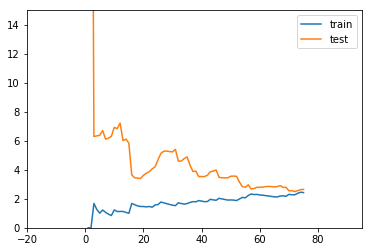

In [15]:
reg = LinearRegression()
plot_learning_curve(reg, X_train, X_test, y_train, y_test)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

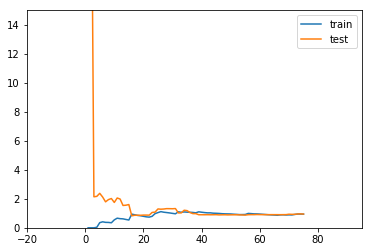

In [17]:
reg2 = PolynomialRegression(2)
plot_learning_curve(reg2, X_train, X_test, y_train, y_test)

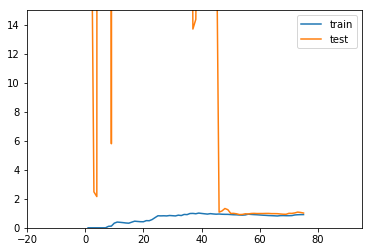

In [21]:
reg6 = PolynomialRegression(6)
plot_learning_curve(reg6, X_train, X_test, y_train, y_test)